In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx
import collections
import pandas as pd

%matplotlib inline

C:\Users\roma\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


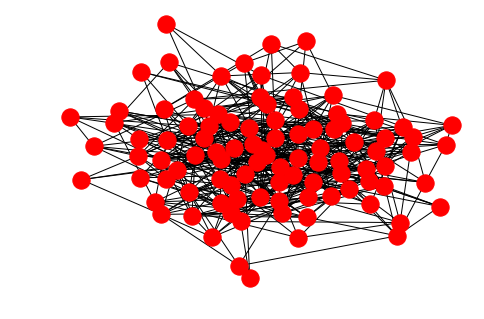

In [2]:
# С использованием networkx строим случайную сеть размера 100 с числом связей - ?

er=nx.erdos_renyi_graph(100,0.1)
nx.draw(er)

In [3]:
nx.density(er)

0.09858585858585858

In [4]:
# Как эта сеть соотносится с реальностью? Никак
nx.average_clustering(er)

0.09607199826317472

In [5]:
degree_sequence = sorted([d for n, d in er.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
degreeCount

Counter({19: 1,
         17: 4,
         16: 1,
         15: 6,
         14: 4,
         13: 4,
         12: 6,
         11: 12,
         10: 16,
         9: 13,
         8: 3,
         7: 12,
         6: 5,
         5: 7,
         4: 4,
         3: 1,
         2: 1})

In [6]:
list(zip(*degreeCount.items()))

[(19, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2),
 (1, 4, 1, 6, 4, 4, 6, 12, 16, 13, 3, 12, 5, 7, 4, 1, 1)]

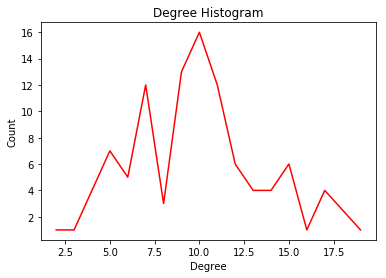

In [7]:
# Строим распределение степени центральностей для графа
deg, cnt = zip(*degreeCount.items())
plt.plot(deg,cnt,color='red')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree");

In [8]:
# Задаем характеристики случайного графа и строим исходя из этого сеть

n=1000
p=0.0002

er=nx.erdos_renyi_graph(n,p)

degree = er.degree()

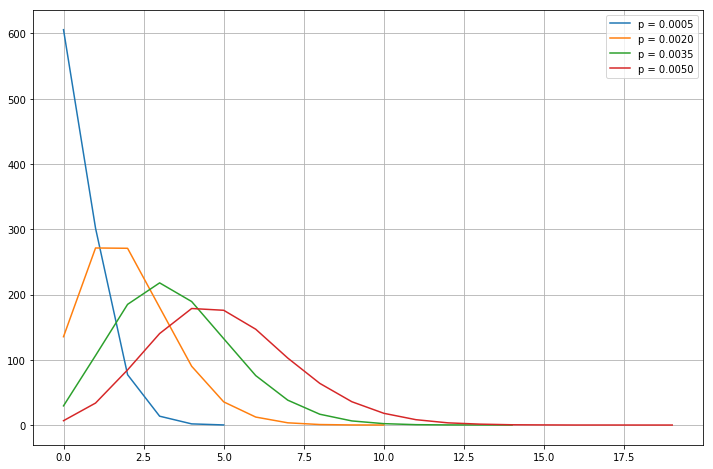

In [9]:
#Самостоятельная/домашняя работа
#Зафиксируйте n=1000. 
#Для p  от 0,0005 до 0,002 с шагом 0,0003 (всего 4 варианта сетей) сгенерируйте по 100 ER графов.
#Усредните распределения по степени узлов. Изобразите все 4 распределения.
#Какие выводы можно сделать?

n = 1000
m = 100

plt.figure(figsize=(12, 8))

for p in np.linspace(0.0005, 0.005, 4):
    s = np.zeros(0, dtype=np.int32)
    for i in range(m):
        er = nx.erdos_renyi_graph(n, p)
        cnt = np.unique([d for n, d in er.degree()], return_counts=True)
        s = np.hstack([s, np.zeros(max([1 + max(cnt[0]) - len(s), 0]))])
        s[cnt[0]] += cnt[1]
    s = s / (i + 1)
    plt.plot(s, label='p = {:.4f}'.format(p))

plt.grid()
plt.legend()

In [10]:
#Аналогично для BA и WS графов (но давайте проговорим отдельно особенности ВА графов)
m=3
ba=nx.barabasi_albert_graph(n, m, seed=None)

k=2
prob=0.3
ws=nx.watts_strogatz_graph(n, k, prob, seed=None)

In [11]:
#А теперь давайте посмотрим на размер связного компонента
largest = max(nx.connected_component_subgraphs(er),key=len)
print("Размер связного компонента {} вершин и {} ребер.".format(largest.number_of_nodes(), 
                                                                largest.number_of_edges()))

Размер связного компонента 993 вершин и 2522 ребер.


In [12]:
#Самостоятельная работа
#Зафиксируйте n=1000. 
#Для p от 0,0005 до 0,002 с шагом 0,0003 (всего 4 варианта сетей) сгенерируйте по 100 ER графов.
#Проанализируйте изменение размера связного компонента (число вершин и число ребер в нем) 

### Index of Complex Networks

https://icon.colorado.edu/#!/networks

### _Adolescent health_
http://konect.uni-koblenz.de/networks/moreno_health

This directed network was created from a survey that took place in 1994/1995. Each student was asked to list his 5 best female and his 5 male friends. A node represents a student and an edge between two students shows that the left student chose the right student as a friend. Higher edge weights indicate more interactions and a edge weight shows that there is no common activity at all.

In [13]:
a = pd.read_csv('moreno_health/out.moreno_health_health', sep=' ', header=None, skiprows=2, names=['from', 'to', 'weight'])

a.head()

,from,to,weight
0,1,2,1
1,1,3,5
2,1,4,5
3,1,5,1
4,1,6,1


In [14]:
G = nx.DiGraph()

In [15]:
G.add_nodes_from(a['from'].unique())

G.add_edges_from(zip(a['from'], a['to']))

In [16]:
cnt = np.unique([d for n, d in G.in_degree()], return_counts=True)

cnt

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 array([ 98, 274, 330, 342, 307, 278, 224, 157, 106, 103,  71,  56,  47,
         40,  28,  21,  19,  10,   7,   6,   5,   1,   1,   1,   2,   3,
          1,   1], dtype=int64))

In [17]:
nx.density(G)

0.00201257545412138

In [18]:
nx.average_clustering(G)

0.11988435473363195

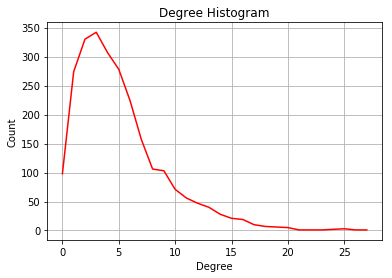

In [19]:
plt.plot(*cnt, color='red')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.grid()